In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.6 MB/s eta 0:00:00


In [23]:
# Importe a biblioteca e baixe os recursos necessários
import nltk
nltk.download('punkt')       # Tokenizador de texto
nltk.download('stopwords')   # Lista de palavras irrelevantes (ex: "e", "de", "a")
nltk.download('wordnet')     # Base de dados para lematização
nltk.download('averaged_perceptron_tagger') # Para POS tagging
nltk.download('punkt_tab')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

# Carregar e Pré-processar o Texto

In [14]:
import pdfplumber

In [15]:
# Função para carregar o texto do PDF
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text()
    #text = text.replace("\n", " ")
    return text

In [16]:
pdf_path = 'artigo.pdf'
# Extrair texto do PDF
texto = extract_text_from_pdf(pdf_path)

In [17]:
texto

'Laksono et al. Geoenvironmental Disasters (2024) 11:6 Geoenvironmental Disasters\nhttps://doi.org/10.1186/s40677-024-00269-6\nREVIEW Open Access\nExploring the Mediterranean tsunami\nresearch landscape: scientometric insights\nand future prospects\nF x Anjar Tri Laksono1,2*, Manoranjan Mishra3, Budi Mulyana4,5 and János Kovács1,6\nAbstract\nBackground The Mediterranean Sea is a region characterized by high seismic activity, with at least 200 tsunami\nevents recorded from the fourth century to the present twenty-first century. Numerous studies have been conducted\nto understand past tsunami events, earthquake–tsunami generation, tsunami recurrence periods, tsunami vulnerabil-\nity zones, and tsunami hazard mitigation strategies. Therefore, gaining insights into future trends and opportunities\nin Mediterranean Sea tsunami research is crucial for significantly contributing to all relevant aspects. This study aims\nto assess such trends and opportunities through a scientometric analysis 

# Tokenização

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenização de frases
frases = sent_tokenize(texto, language='portuguese')
print(f"Número de frases: {len(frases)}")

# Tokenização de palavras
palavras = word_tokenize(texto.lower(), language='portuguese')  # Converta para minúsculas
print(f"Número de palavras: {len(palavras)}")

Número de frases: 1300
Número de palavras: 20941


# Remoção de Stopwords e pontuação

In [20]:
from nltk.corpus import stopwords

stopwords_pt = set(stopwords.words('portuguese'))
pontuacao = ['.', ',', '!', '?', ';', ':', '(', ')', '"', "'", "”", "“"]

palavras_filtradas = [
    palavra for palavra in palavras
    if palavra not in stopwords_pt and palavra not in pontuacao
]

print(f"Palavras após filtragem: {len(palavras_filtradas)}")

Palavras após filtragem: 16280


# Análise de frequência

20 palavras mais comuns:
[('the', 780), ('and', 510), ('of', 503), ('in', 340), ('tsunami', 268), ('et', 194), ('al', 193), ('to', 168), ('10', 164), ('https', 160), ('//', 150), ('doi', 150), ('org/', 149), ('mediterranean', 111), ('research', 110), ('is', 88), ('sea', 82), ('with', 82), ('on', 82), ('j', 79)]


<Axes: title={'center': 'Frequência das 20 palavras mais comuns'}, xlabel='Samples', ylabel='Counts'>

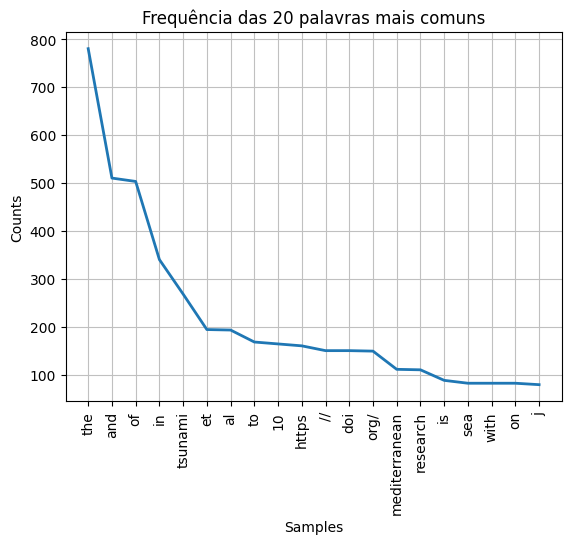

In [21]:
from nltk import FreqDist

frequencia = FreqDist(palavras_filtradas)
print("20 palavras mais comuns:")
print(frequencia.most_common(20))

# Plotar um gráfico de frequência
frequencia.plot(20, title="Frequência das 20 palavras mais comuns")

# Stemming/Lematização

In [24]:
from nltk.stem import RSLPStemmer  # Stemmer para português

stemmer = RSLPStemmer()
palavras_stem = [stemmer.stem(palavra) for palavra in palavras_filtradas]
print("Exemplo de stemming:", palavras_stem[:10])

Exemplo de stemming: ['lakson', 'et', 'al', 'geoenvironment', 'disast', '2024', '11:6', 'geoenvironment', 'disast', 'http']


# Análise de sentimentos

In [27]:
from textblob import TextBlob

# Exemplo com uma frase
frase = "I love pizza!"
analise = TextBlob(frase)
print(f"Polaridade: {analise.sentiment.polarity}")  # -1 (negativo) a 1 (positivo)

Polaridade: 0.625


# WordCloud

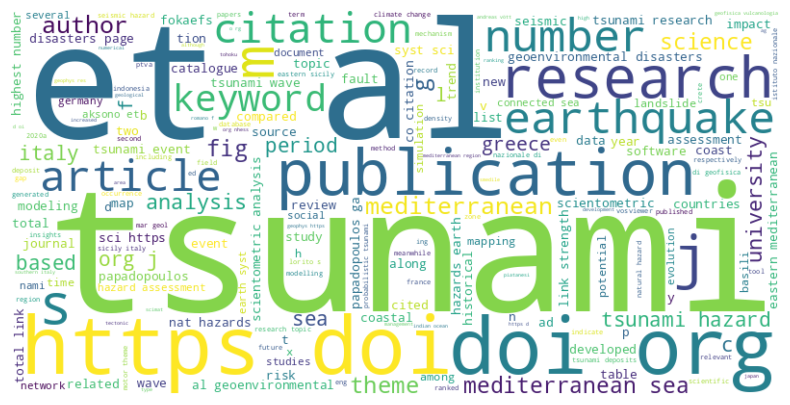

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto_para_nuvem = ' '.join(palavras_filtradas)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_para_nuvem)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
import re

In [32]:
# Limpeza prévia com regex
texto_limpo = re.sub(r'\b(?:doi|https?|www|et|al)\b[\w:/.-]*', '', texto, flags=re.IGNORECASE)

In [33]:
# Tokenização
palavras = word_tokenize(texto_limpo.lower(), language='portuguese')

# Stopwords customizadas
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_customizadas = stopwords_pt.union({"exemplo", "tabela"})

# Filtragem final
palavras_filtradas = [
    palavra for palavra in palavras
    if palavra.isalpha()
    and len(palavra) > 2
    and palavra not in stopwords_customizadas
]

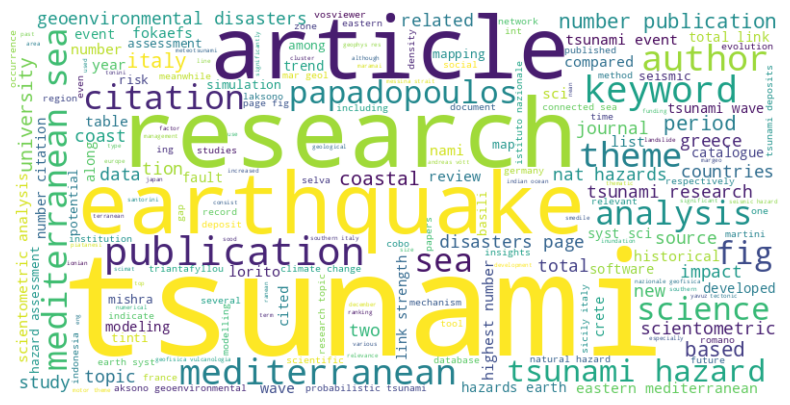

In [34]:
texto_para_nuvem = ' '.join(palavras_filtradas)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_para_nuvem)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Similaridade de textos

In [35]:
!kaggle datasets download -d rishisankineni/text-similarity

Dataset URL: https://www.kaggle.com/datasets/rishisankineni/text-similarity
License(s): DbCL-1.0
  0% 0.00/54.8k [00:00<?, ?B/s]
100% 54.8k/54.8k [00:00<00:00, 63.4MB/s]


In [36]:
!unzip text-similarity.zip

Archive:  text-similarity.zip
  inflating: test.csv                
  inflating: train.csv               


In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('train.csv')

In [40]:
df.head()

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True


In [42]:
from nltk.util import ngrams
from nltk.metrics import jaccard_distance

In [43]:
def jaccard_similarity(text1, text2):
    tokens1 = set(word_tokenize(text1.lower()))
    tokens2 = set(word_tokenize(text2.lower()))
    return 1 - jaccard_distance(tokens1, tokens2)  # Convertendo para similaridade




In [45]:
# Exemplo:
text1 = "vanguard total bond index adm"
text2 = "vanguard tot bd mkt adm"
print(jaccard_similarity(text1, text2))  # Quanto mais próximo de 1, mais similares

0.25


In [47]:
# Aplicar a função jaccard_similarity linha a linha
df['Similaridade'] = df.apply(lambda row: jaccard_similarity(row['description_x'], row['description_y']), axis=1)


In [48]:
df['Similaridade'].head()

,Similaridade
0,0.428571
1,0.500000
2,0.250000
3,0.666667
4,0.400000


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [52]:
def cosine_sim(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]  # Resultado entre 0 e 1

# Exemplo:
print(cosine_sim(text1, text2))

0.25233420143369617


In [53]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

def bert_similarity(text1, text2):
    emb1 = model.encode(text1, convert_to_tensor=True)
    emb2 = model.encode(text2, convert_to_tensor=True)
    return cosine_similarity([emb1.cpu().numpy()], [emb2.cpu().numpy()])[0][0]

print(bert_similarity(text1, text2))


0.5860523


In [55]:

df['Similaridade2'] = df.apply(lambda row: bert_similarity(row['description_x'], row['description_y']), axis=1)


In [56]:
df['Similaridade2'].head()

,Similaridade2
0,0.584491
1,0.840744
2,0.735847
3,0.954885
4,0.720639
